# Introduction and Environment Setup

The advent of powerful Large Language Models (LLMs) has fundamentally altered the landscape of artificial intelligence applications.

The primary interface for these models is natural language, making the skill of crafting effective inputs—a discipline known as **prompt engineering**—a critical component for developers and researchers.

Prompt engineering is not merely the act of asking a question; it is the science of designing and optimizing prompts to guide LLMs toward desired outcomes with precision, reliability, and efficiency.

As models grow in capability, the sophistication of interaction methods must evolve in parallel.

Simple instructions suffice for simple tasks, but unlocking the full potential for complex reasoning, persona adoption, and interaction with external systems requires a more advanced approach.

## Setup your free API Key using Google's AI Studio

https://aistudio.google.com/


### Install necessary libraries

In [2]:
!pip install --upgrade --quiet langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.43.0, but you have google-auth 2.45.0 which is incompatible.


In [3]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

# Access the API key from Colab Secrets
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# Initialize the model
gemini_client = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

# Now you can use the llm to interact with the model
response = gemini_client.invoke("""

## **1. Role (Persona)**

You are an expert NLP analyst specializing in sentiment interpretation. You have advanced experience evaluating emotional tone, contextual nuance, and linguistic subtleties across diverse text genres. You communicate clearly, concisely, and with analytical precision.

---

## **2. Context (Background Information)**

You will receive short or long pieces of user-generated text. These may include reviews, emails, comments, transcripts, social media posts, or general statements. The sentiment may be explicit, mixed, implicit, or context-dependent. The goal is to reliably classify sentiment and explain the reasoning behind the classification.

---

## **3. Task (Instruction/Directive)**

Analyze the sentiment of the given text. Determine whether it is **Positive**, **Negative**, **Neutral**, or **Mixed**. Provide a short justification grounded in specific textual evidence.

---

## **4. Examples (Few-Shot Samples)**

### **Example 1**

**Input:**
“I love the new update! The interface is clean and everything works smoothly.”

**Output:**

* **Sentiment:** Positive
* **Reasoning:** Expresses satisfaction (“love,” “clean,” “works smoothly”).

---

### **Example 2**

**Input:**
“This app keeps crashing. I can’t get anything done.”

**Output:**

* **Sentiment:** Negative
* **Reasoning:** Strong dissatisfaction (“keeps crashing,” “can’t get anything done”).

---

### **Example 3**

**Input:**
“The product is fine. Nothing special, but not bad either.”

**Output:**

* **Sentiment:** Neutral
* **Reasoning:** Balanced language without strong positive or negative statements.

---

### **Example 4**

**Input:**
“The service was great, but delivery took forever.”

**Output:**

* **Sentiment:** Mixed
* **Reasoning:** Contains both positive (“great”) and negative (“took forever”) aspects.

---

## **5. Constraints (Rules/Warnings)**

* Do **not** rewrite or correct the input text.
* Do **not** add details not present in the input.
* Keep reasoning brief (1–3 sentences).
* Maintain objective analytical tone.
* Output only what is requested—no extra commentary or disclaimers.

---

## **6. Output Format**

Respond **strictly** in the following JSON structure:

```json
{
  "sentiment": "<Positive|Negative|Neutral|Mixed>",
  "reasoning": "<short explanation referencing text>",
  "confidence": "<percentage from 0-100>"
}
```
Input: This class is amazing! The students are very interactive which helps the teacher!!

""")
print(response.content)

```json
{
  "sentiment": "Positive",
  "reasoning": "The text uses strong positive language like 'amazing' and highlights beneficial aspects such as 'very interactive' students that 'helps the teacher'.",
  "confidence": 98
}
```


# The Anatomy of an Effective Prompt: A Unified Framework

A fundamental advancement in prompt engineering is the realization that a prompt is not a monolithic question but a structured document composed of distinct components.

- **Role (or Persona):** This component defines who the model should be. Assigning a role, such as "You are a senior technical support specialist," constrains the model's vast knowledge base, forcing it to filter its response through a specific lens of expertise, tone, and style. This dramatically improves the coherence and domain-specificity of the output.


- **Context (or Background Information):** This provides the necessary background for the task. It can include user history, product documentation, previous conversation turns, or any other data that informs the query. Providing rich context is essential for generating relevant and personalized responses.


- **Task (or Instruction/Directive):** This is the core of the prompt—a clear, specific, and unambiguous statement of the action the model should perform. The use of direct action verbs (e.g., "Analyze," "Summarize," "Generate," "Classify") is critical for clarity.


- **Examples (or Shots):** These are high-quality examples of the desired input-output pattern. They are the foundation of few-shot prompting and are one of the most powerful tools for controlling output format and style. By showing the model exactly what is expected, examples enable a form of in-context learning.


- **Constraints (or Rules/Warnings):** This component defines the boundaries for the response. It specifies what the model should not do, such as avoiding certain topics, adhering to a word count, or refraining from using technical jargon. These "guardrails" are crucial for safety and brand alignment.


- **Output Format (or Structure):** This explicitly defines the structure of the desired output, such as JSON, Markdown, or a bulleted list. Specifying the format is vital for applications that need to programmatically parse the model's response, as it ensures the output is machine-readable and consistent.

To help the model distinguish between these different components, it is a best practice to use clear delimiters. Structuring the prompt with markers like Markdown headers (e.g., `###Instruction###`).

# Let's talk about RAG, now



# Our Approach

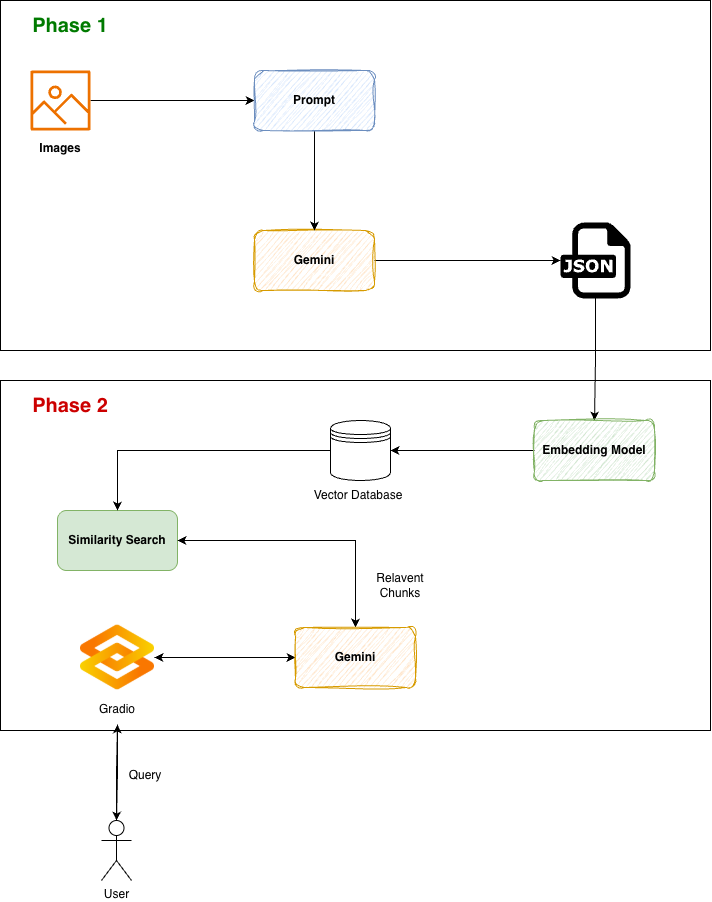




## The prompt

In [4]:
image_description_prompt = """
**Role:**
You are an expert Computer Vision Metadata Specialist and SEO Archivist. You possess a deep understanding of visual semantics, image indexing, and natural language retrieval. Your capability involves translating visual data into precise, machine-readable text optimized for search algorithms.

**Context:**
We are building a high-performance multimodal search engine. The metadata you generate will be used to populate a vector database, allowing users to find images using both specific keyword matching and semantic natural language queries (e.g., "a quiet place to work with coffee"). High accuracy and descriptive depth are required to distinguish between similar images.

**Task:**
Analyze the provided image and generate a structured JSON object containing detailed metadata. You must extract the main subject, describe the scene atmospherics, identify visual elements, transcribe specific text, and generate search-optimized keywords.

**Constraints:**

1.  **Description:** Must be objective and factual. Limit to 2-3 sentences. Focus on action, lighting, and mood.
2.  **Text Content:** If no text is visible, return `null`. If text is visible, transcribe it exactly as it appears, preserving case where possible.
3.  **Keywords:** Provide exactly 10-15 keywords. Mix broad concepts (e.g., "urban," "melancholy") with specific objects (e.g., "red umbrella," "taxi").
4.  **Safety:** Do not generate content that violates safety policies. If the image is unclear or blurry, note this in the description.
5.  **Format:** The output must be raw JSON only. Do not include markdown formatting (like ` json ...  `) or conversational filler.

**Examples:**

*Input:* [An image of a golden retriever catching a frisbee in a park on a sunny day]

*Output:*

```json
{
  "main_subject": "Golden Retriever dog",
  "detailed_description": "A golden retriever leaps into the air to catch a red frisbee against a clear blue sky. The lighting is bright and natural, casting sharp shadows on the green grass below. The mood is energetic and playful.",
  "visual_elements": [
    "Golden Retriever",
    "Red Frisbee",
    "Green Grass",
    "Blue Sky",
    "Motion Blur"
  ],
  "text_content": null,
  "search_keywords": [
    "dog",
    "pet",
    "playing",
    "fetch",
    "frisbee",
    "park",
    "sunny",
    "action shot",
    "canine",
    "jumping",
    "outdoor",
    "joyful",
    "golden retriever",
    "summer"
  ]
}
```

**Output Format:**
Generate the response in the following JSON structure:

```json
{
  "main_subject": "String",
  "detailed_description": "String",
  "visual_elements": ["String", "String"],
  "text_content": "String or null",
  "search_keywords": ["String", "String"]
}
```
"""

# Processing One Image

In [5]:
import os
import base64
import mimetypes
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# Initialize the model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.2
)

# 2. Helper function to encode image to Base64
def encode_image(image_path):
    """Encodes a local image to base64 string."""
    # https://en.wikipedia.org/wiki/Base64
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# 3. The Metadata Function
def generate_search_metadata(image_path, llm, prompt_text):
    """
    Generates a detailed description using LangChain and Gemini.
    """
    try:
        # Determine mime type (e.g., 'image/jpeg', 'image/png')
        mime_type, _ = mimetypes.guess_type(image_path)
        if not mime_type:
            mime_type = 'image/jpeg' # Default fallback

        # Get Base64 string
        img_base64 = encode_image(image_path)

        # Create the Multimodal Message
        # LangChain expects a list of dictionaries for multimodal content
        message = HumanMessage(
            content=[
                {"type": "text", "text": prompt_text},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:{mime_type};base64,{img_base64}"}
                }
            ]
        )

        # Invoke the LLM
        response = llm.invoke([message])

        return response.content.replace('```json', '').replace('```', '')

    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return None
    except Exception as e:
        print(f"An error occurred during generation: {e}")
        return None

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import os

folder_path = "/content/drive/MyDrive/Day17_RAG/images/"
print("Folder exists:", os.path.exists(folder_path))

if os.path.exists(folder_path):
    print("Files in images folder:")
    for f in os.listdir(folder_path):
        print(f)


Folder exists: False


In [13]:
import os

print("Folders in MyDrive:\n")
for f in os.listdir("/content/drive/MyDrive"):
    print(f)


Folders in MyDrive:

Colab Notebooks
Screenshot_2025-02-02-13-26-07-813_com.google.android.apps.nbu.paisa.user.jpg
Screenshot_2025-02-06-14-17-59-217_com.miui.gallery_prev_ui.png
Screenshot_2025-03-04-23-19-17-601_com.whatsapp.jpg
IMG_20250304_234927 (1).jpg
IMG_20250304_234927.jpg
IMG_20250315_170132.jpg
IMG-20250401-WA0013.jpg
IMG_20241222_225740_785.jpg
Screenshot_2025-02-06-14-17-59-217_com.miui.gallery.jpg
Getting started.pdf
Untitled folder (1)
iLovePDF
Classroom
IMG_20250101_231656.jpg
Jaipur 1.pdf
zip.zip
balkrishna.pdf
GrantMatch  Team NEXA.pdf
'aarya resume.docx' with you from WPS Office
aarya resume (4).pdf
I am sharing 'aarya resume.pdf' with you from WPS Office
aarya resume (3).pdf
aarya resume (2).pdf
aarya resume (1).pdf
aarya resume.pdf
WIN_20250618_12_41_54_Pro (2).mp4
Aarya Poyrekar.pdf
IMG_3805 copy (2).jpg
IMG_3805 copy (1).jpg
IMG_3805 copy.jpg
IMG_20250704_223821.jpg
Screenshot_2025-07-04-22-40-55-409_com.whatsapp.jpg
IMG_20250704_224755.jpg
IMG_20250704_224856.jp

In [14]:
import os

os.listdir("/content/drive/MyDrive/Day17_RAG")


['img_01.jpg',
 'img_02.jpg',
 'ima_03.jpg',
 'img_04.jpg',
 'img_05.jpg',
 'img_06.jpg',
 'img_07.jpg',
 'img_08.jpg',
 'img_09.jpg',
 'img_10.jpg',
 'img_11.jpg',
 'img_12.jpg',
 'img_13.jpg',
 'img_14.jpg',
 'img_15.jpg',
 'img_16.jpg']

In [15]:
image_path = "/content/drive/MyDrive/Day17_RAG/img_01.jpg"

metadata = generate_search_metadata(image_path, llm, image_description_prompt)

if metadata:
    print(metadata)



{
  "main_subject": "Modern classroom",
  "detailed_description": "An empty modern classroom is illuminated by warm, soft natural light streaming through large windows on the left. Student desks with laptops and disposable coffee cups are arranged in rows, facing a whiteboard covered with mathematical equations and a suspended projection screen. The scene conveys a quiet, studious atmosphere, suggesting a period before or after class.",
  "visual_elements": [
    "Classroom",
    "Student desks",
    "Chairs",
    "Laptops",
    "Coffee cups",
    "Whiteboard",
    "Mathematical equations",
    "Data analysis formulas",
    "Projection screen",
    "Ceiling projector",
    "Windows",
    "Natural light",
    "Wall speakers",
    "Wooden door",
    "Trash bin",
    "Power cables",
    "Carpeted floor"
  ],
  "text_content": "Don - R?P O\nE = (P(1-L) * G)\nS(R) = S_e (1-S_p)\nE = S(R) * G\nData [P_i, y_i, Z_i] i=1, ... N\nANALYSIS [P_i, Y_i, Z_i]\nRegression model\nR2 = 16.10.3\n2.11M =

# Processing All Images

In [16]:
# Processing All Images
import os
import json

# 🔹 UPDATED PATHS FOR YOUR DATASET
source_folder = "/content/drive/MyDrive/Day17_RAG/"
output_folder = "/content/drive/MyDrive/Day17_RAG/jsons/"

os.makedirs(output_folder, exist_ok=True)

# Supported image extensions to filter for
valid_extensions = ('.jpg', '.jpeg', '.png', '.webp', '.heic')

print(f"Starting processing for images in: {source_folder}\n")

files = os.listdir(source_folder)

# Calculate total relevant files for the progress counter
total_files = len([f for f in files if f.lower().endswith(valid_extensions)])
processed_count = 0

for filename in files:
    if filename.lower().endswith(valid_extensions):

        image_path = os.path.join(source_folder, filename)

        # Define the output JSON path (same name as image, but .json extension)
        json_filename = f"{os.path.splitext(filename)[0]}.json"
        json_path = os.path.join(output_folder, json_filename)

        if os.path.exists(json_path):
            print(f"[{processed_count + 1}/{total_files}] Skipping: {filename} (JSON already exists)")
            processed_count += 1
            continue

        print(f"[{processed_count + 1}/{total_files}] Generating metadata for: {filename}...")

        try:
            # Call your existing function
            description = generate_search_metadata(image_path, llm, image_description_prompt)

            # Ensure description is parsed to dict if returned as string
            if isinstance(description, str):
                description = json.loads(description)

            if description:
                # Prepare the data structure
                data = {
                    "file_path": image_path,
                    "description": description
                }

                # Write to JSON file
                with open(json_path, 'w', encoding='utf-8') as json_file:
                    json.dump(data, json_file, indent=4)

                print(f"   -> Saved to {json_filename}")
            else:
                print(f"   -> Skipped {filename} (Generation returned empty)")

        except Exception as e:
            print(f"   -> Error processing {filename}: {e}")

        processed_count += 1

print("\n--- Processing Complete ---")


Starting processing for images in: /content/drive/MyDrive/Day17_RAG/

[1/16] Generating metadata for: img_01.jpg...
   -> Saved to img_01.json
[2/16] Generating metadata for: img_02.jpg...
   -> Saved to img_02.json
[3/16] Generating metadata for: ima_03.jpg...
   -> Saved to ima_03.json
[4/16] Generating metadata for: img_04.jpg...
   -> Saved to img_04.json
[5/16] Generating metadata for: img_05.jpg...
   -> Saved to img_05.json
[6/16] Generating metadata for: img_06.jpg...
   -> Saved to img_06.json
[7/16] Generating metadata for: img_07.jpg...
   -> Saved to img_07.json
[8/16] Generating metadata for: img_08.jpg...
   -> Saved to img_08.json
[9/16] Generating metadata for: img_09.jpg...
   -> Saved to img_09.json
[10/16] Generating metadata for: img_10.jpg...
   -> Saved to img_10.json
[11/16] Generating metadata for: img_11.jpg...
   -> Saved to img_11.json
[12/16] Generating metadata for: img_12.jpg...
   -> Saved to img_12.json
[13/16] Generating metadata for: img_13.jpg...
   -

# Creating Embeddings

In [17]:
!pip install -U -q langchain-google-genai langchain-chroma chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.4 MB/s eta 0

In [18]:
# Creating Embeddings

import os
import json
import time
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
from google.colab import userdata

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

# 🔹 UPDATED PATHS FOR YOUR DATASET
json_folder = "/content/drive/MyDrive/Day17_RAG/jsons/"
db_path = "/content/drive/MyDrive/Day17_RAG/chroma_db"

# Initialize Embeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

# 2. Check if DB exists before doing heavy lifting
db_exists = os.path.exists(db_path) and os.listdir(db_path)

if db_exists:
    print(f"Database found at {db_path}. Loading existing VectorStore...")
    vectorstore = Chroma(
        persist_directory=db_path,
        embedding_function=embeddings
    )
    print(f"Loaded existing DB with {vectorstore._collection.count()} documents.")

else:
    print("Database not found. Starting ingestion process...")

    # Load ALL JSONs into a list of Documents first (No API calls here)
    documents = []

    if os.path.exists(json_folder):
        files = [f for f in os.listdir(json_folder) if f.endswith('.json')]
        print(f"Found {len(files)} JSON files. Preparing data...")

        for filename in files:
            file_path = os.path.join(json_folder, filename)
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                desc_obj = data.get("description", {})

                # Construct Context
                text_content = f"""
                Subject: {desc_obj.get('main_subject', 'Unknown')}
                Description: {desc_obj.get('detailed_description', '')}
                Keywords: {', '.join(desc_obj.get('search_keywords', []))}
                Visual Elements: {', '.join(desc_obj.get('visual_elements', []))}
                """

                doc = Document(
                    page_content=text_content,
                    metadata={
                        "file_name": data.get("file_name", filename),
                        "file_path": data.get("file_path", "")
                    }
                )
                documents.append(doc)
    else:
        print("JSON folder not found.")

    # 3. Add to Chroma in Batches with Timeout
    if documents:
        print(f"Loaded {len(documents)} documents. Starting ingestion with rate limits...")

        # Initialize the DB (This creates the folder)
        vectorstore = Chroma(
            persist_directory=db_path,
            embedding_function=embeddings
        )

        BATCH_SIZE = 5
        total_batches = (len(documents) + BATCH_SIZE - 1) // BATCH_SIZE

        for i in range(0, len(documents), BATCH_SIZE):
            batch = documents[i : i + BATCH_SIZE]
            current_batch_num = (i // BATCH_SIZE) + 1

            print(f"Processing Batch {current_batch_num}/{total_batches} ({len(batch)} docs)...")

            # A. Add documents (This triggers the API Call)
            vectorstore.add_documents(batch)

            # B. Wait if this is not the last batch
            if i + BATCH_SIZE < len(documents):
                print("   -> Waiting 60 seconds to respect rate limits...")
                time.sleep(60)

        print(f"\nSuccess! All documents saved to: {db_path}")

    else:
        print("No documents to process.")


Database not found. Starting ingestion process...
Found 16 JSON files. Preparing data...
Loaded 16 documents. Starting ingestion with rate limits...
Processing Batch 1/4 (5 docs)...
   -> Waiting 60 seconds to respect rate limits...
Processing Batch 2/4 (5 docs)...
   -> Waiting 60 seconds to respect rate limits...
Processing Batch 3/4 (5 docs)...
   -> Waiting 60 seconds to respect rate limits...
Processing Batch 4/4 (1 docs)...

Success! All documents saved to: /content/drive/MyDrive/Day17_RAG/chroma_db


Database loaded successfully!
Match #1
File: img_16.json
Context: 
                Subject: Data analytics workshop presentation
                Description: A male i...


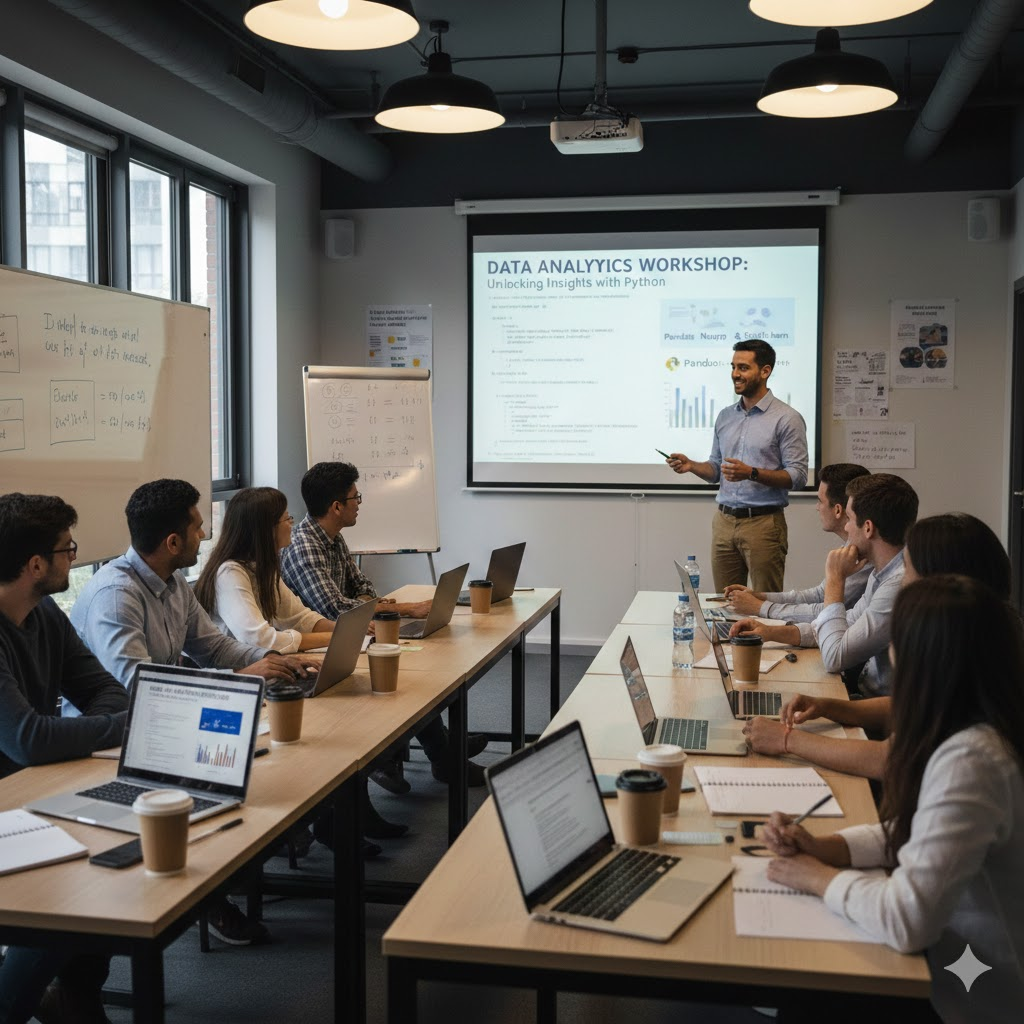

----------------------------------------
Match #2
File: img_06.json
Context: 
                Subject: Python for Data Analytics Workshop poster
                Description: A d...


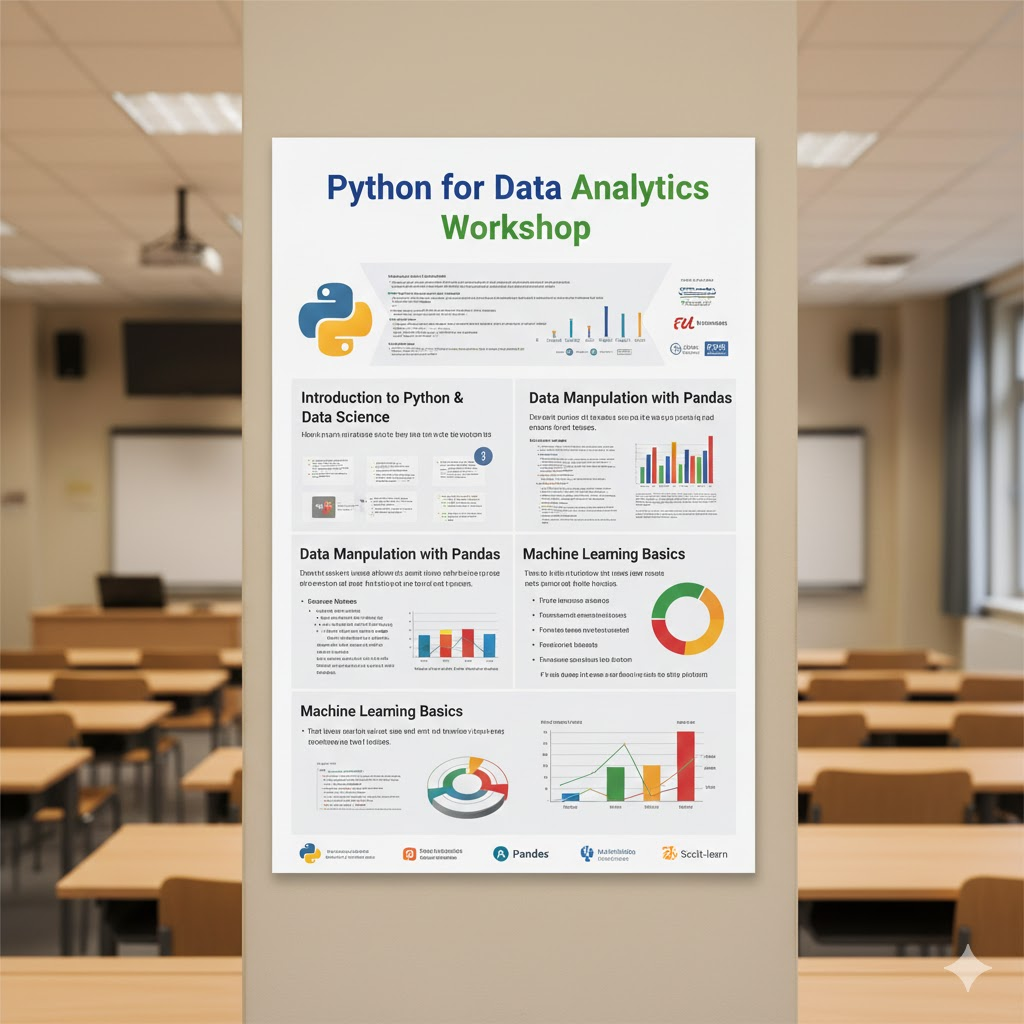

----------------------------------------
Match #3
File: img_14.json
Context: 
                Subject: Certificate of Participation
                Description: A 'Certificate o...


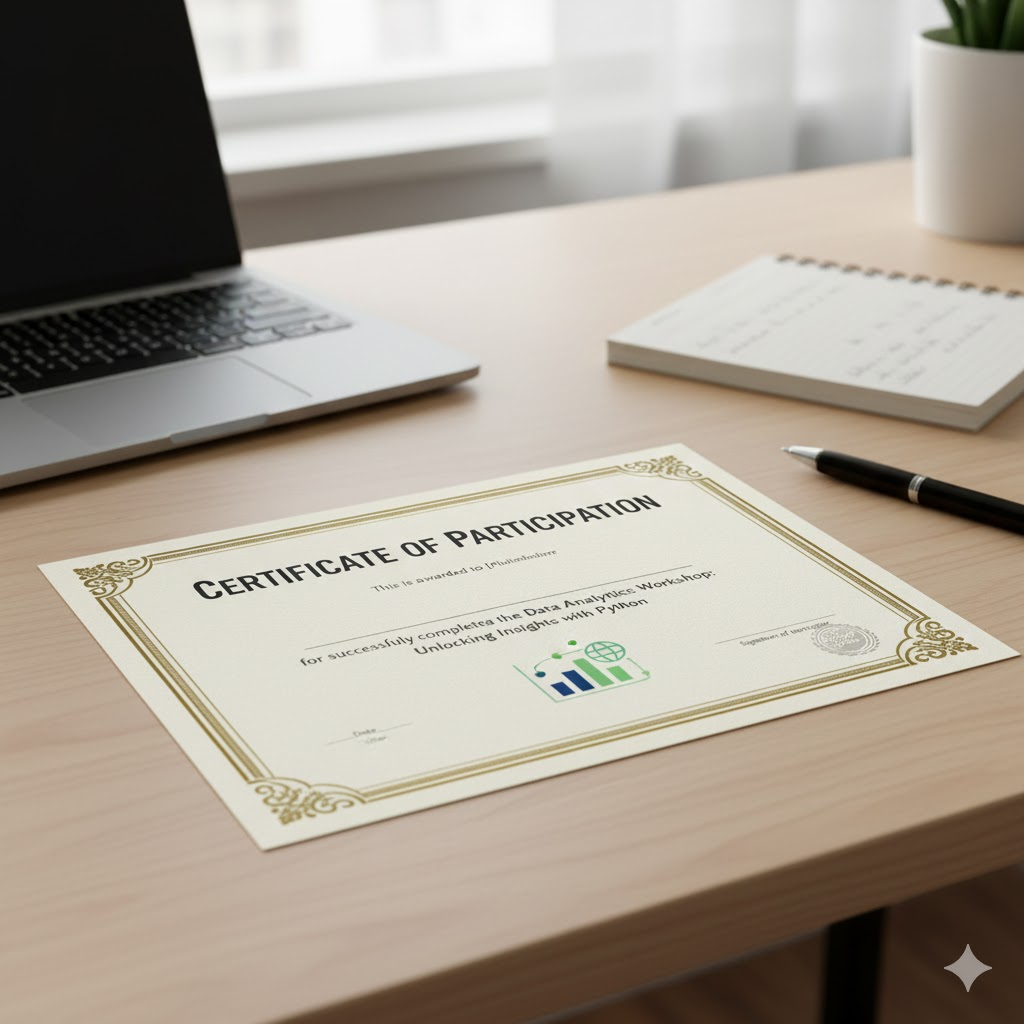

----------------------------------------
Match #1
File: img_02.json
Context: 
                Subject: A laptop displaying a machine learning presentation on a wooden desk
     ...


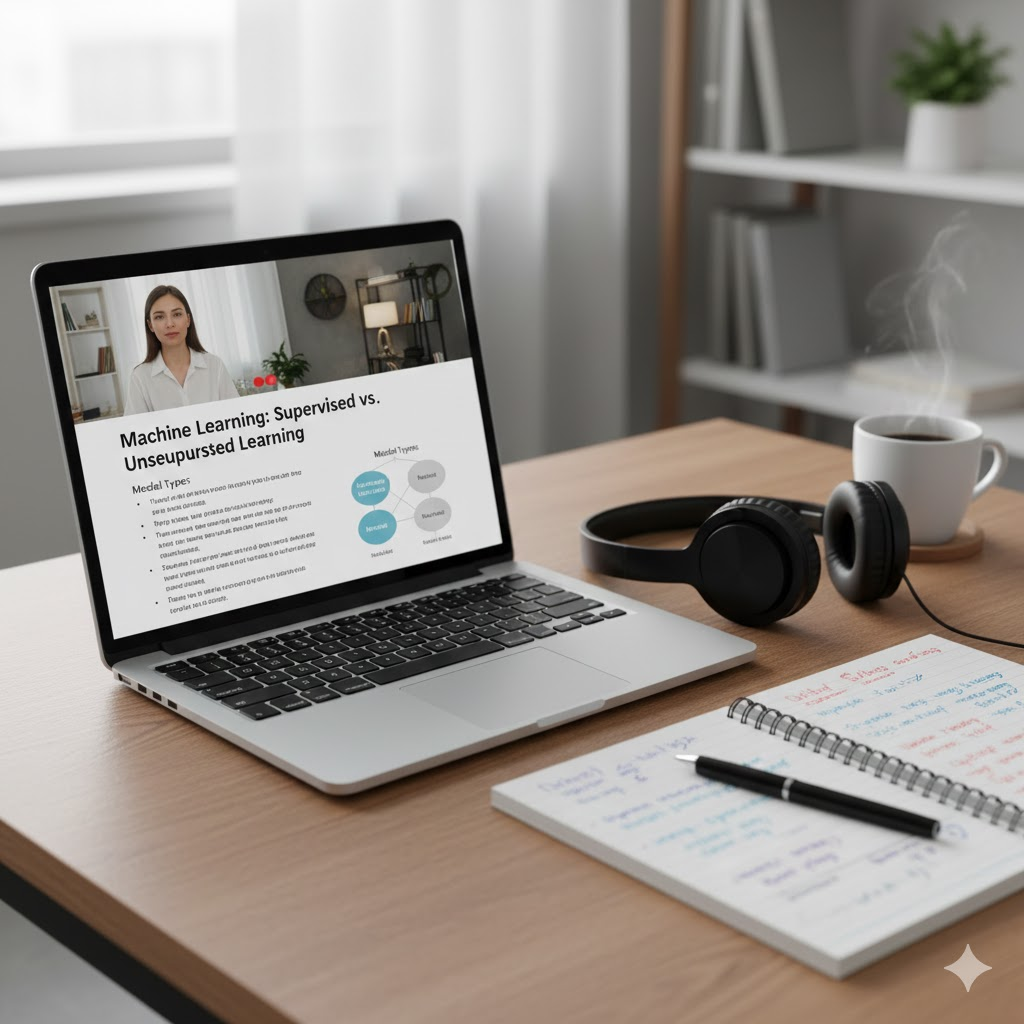

----------------------------------------
Match #2
File: img_07.json
Context: 
                Subject: Organized study or work desk setup
                Description: A well-lit...


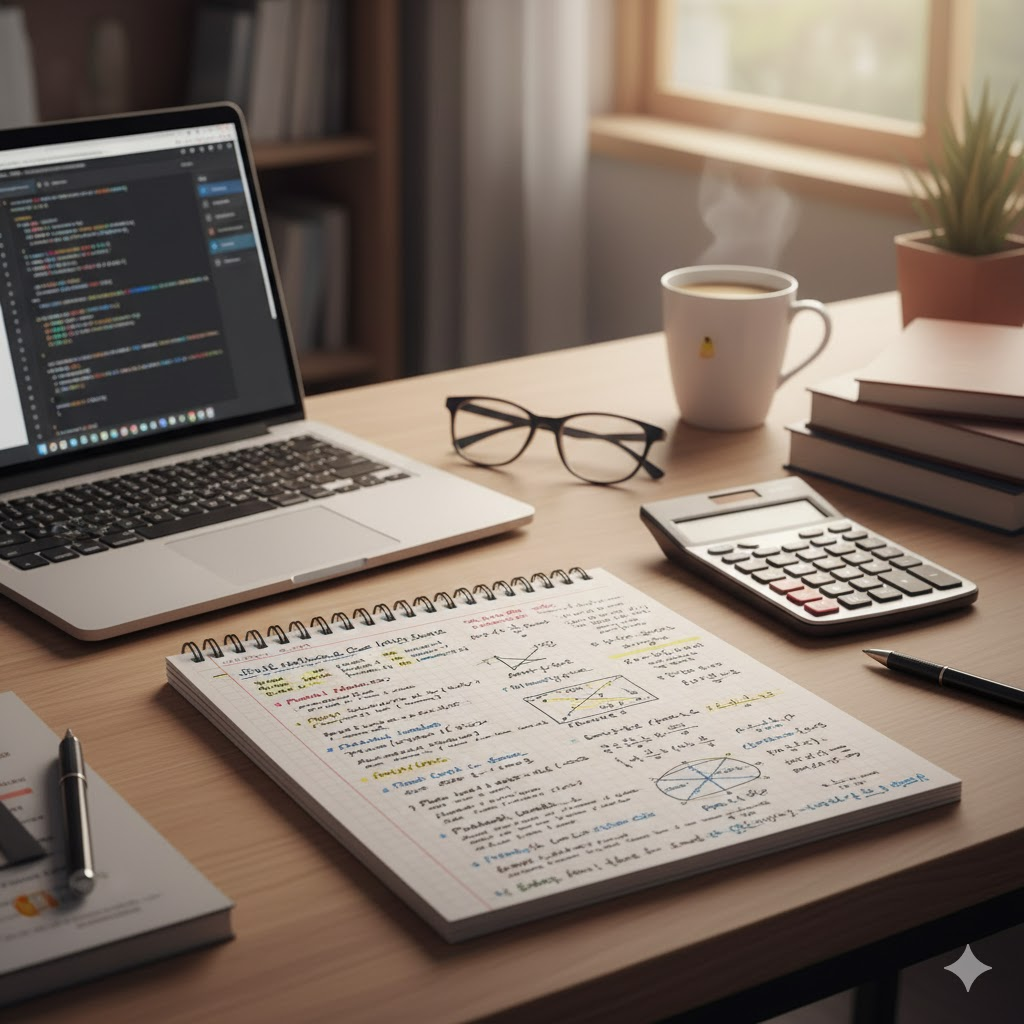

----------------------------------------
Match #3
File: img_04.json
Context: 
                Subject: Students in a computer lab
                Description: A group of student...


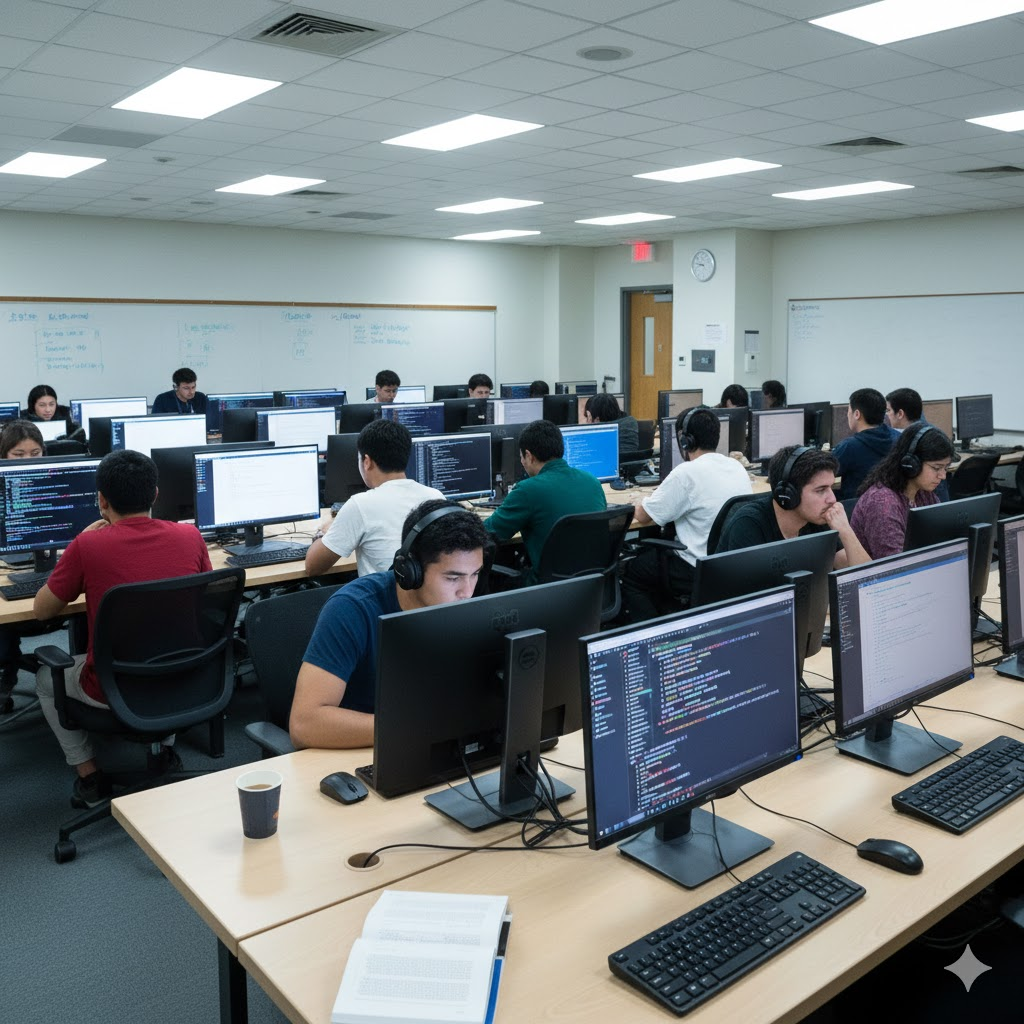

----------------------------------------
Match #1
File: img_05.json
Context: 
                Subject: A man presenting data analytics to an audience
                Description...


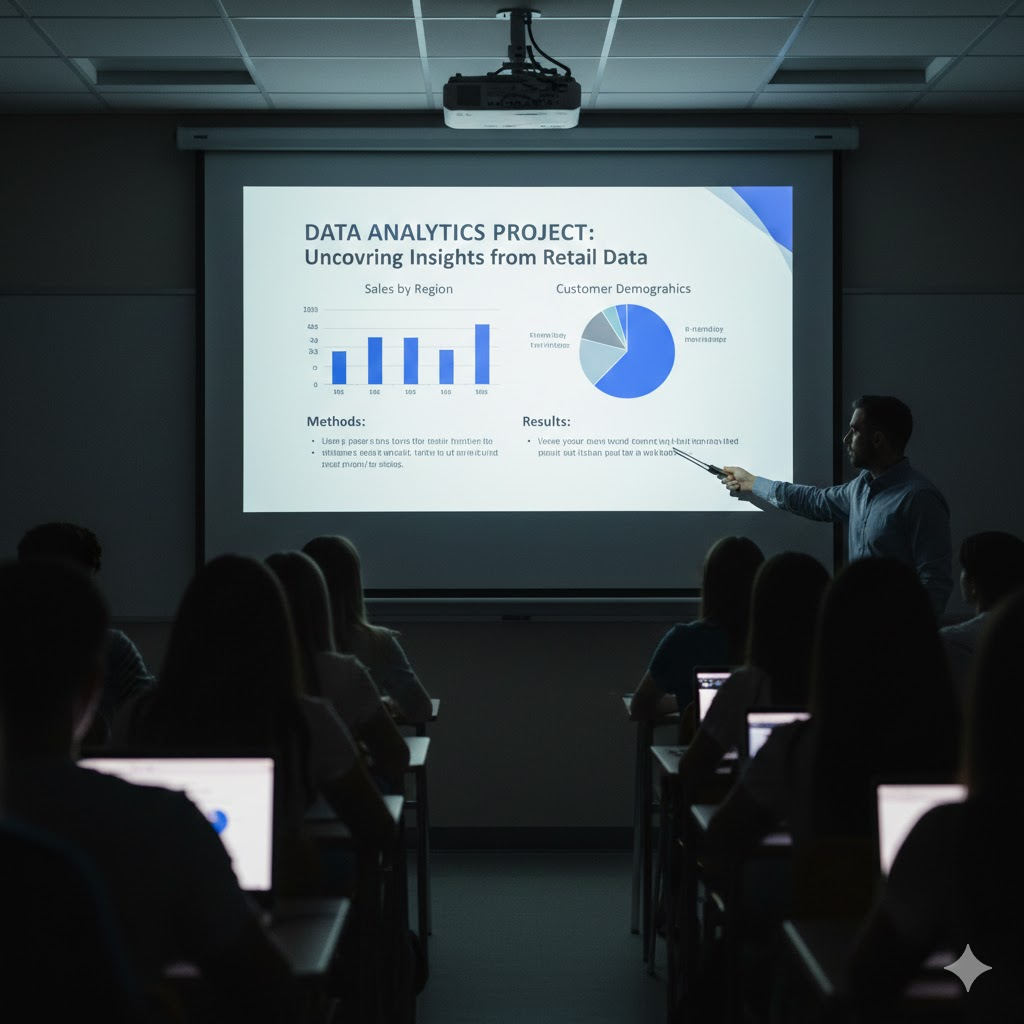

----------------------------------------
Match #2
File: img_16.json
Context: 
                Subject: Data analytics workshop presentation
                Description: A male i...


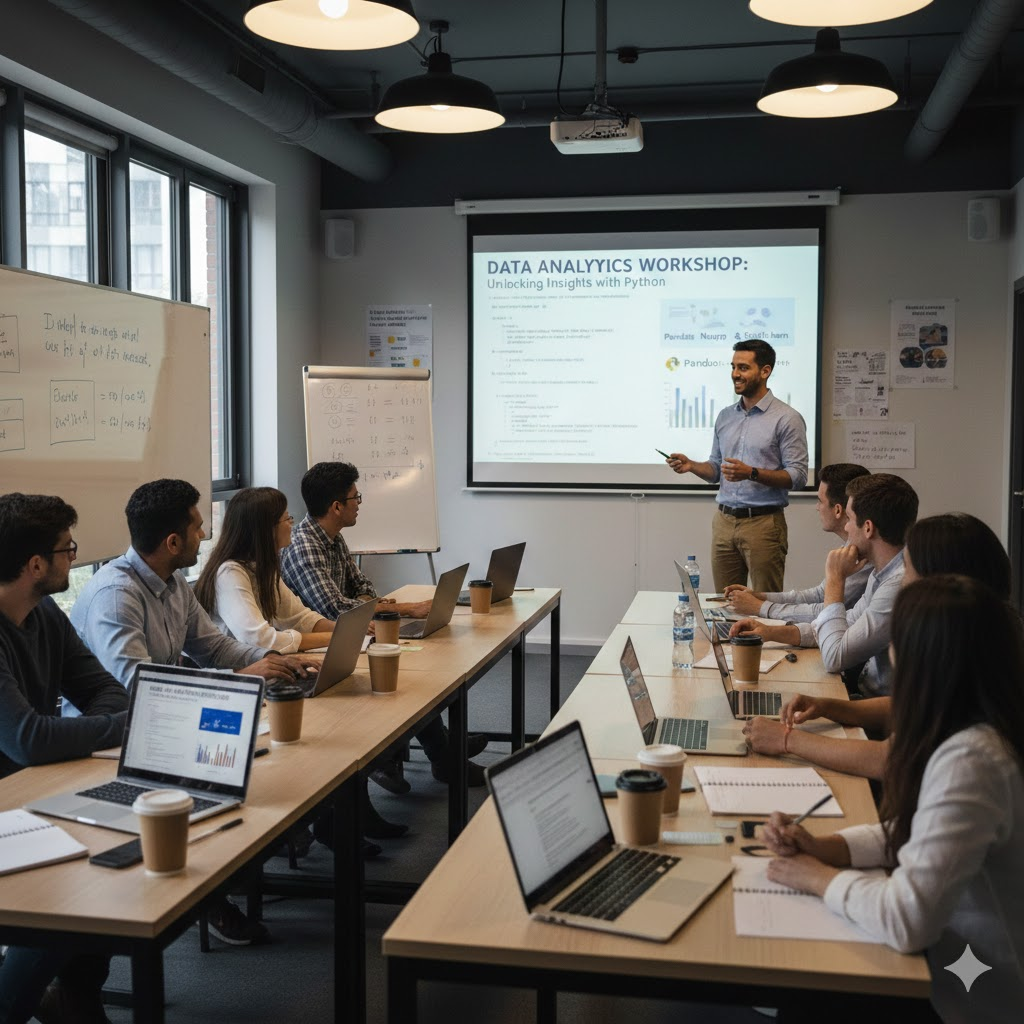

----------------------------------------
Match #3
File: img_02.json
Context: 
                Subject: A laptop displaying a machine learning presentation on a wooden desk
     ...


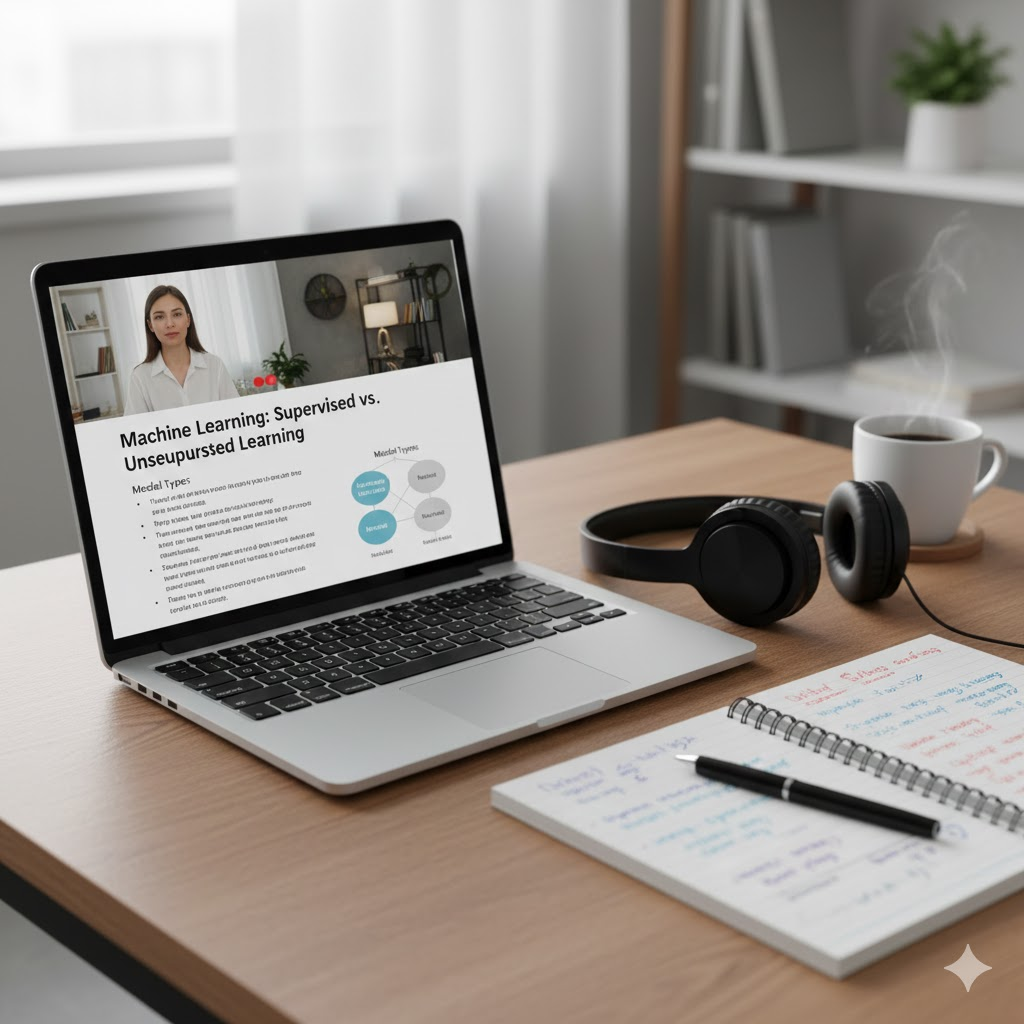

----------------------------------------
Match #1
File: img_15.json
Context: 
                Subject: Modern home office workstation
                Description: A well-lit, or...


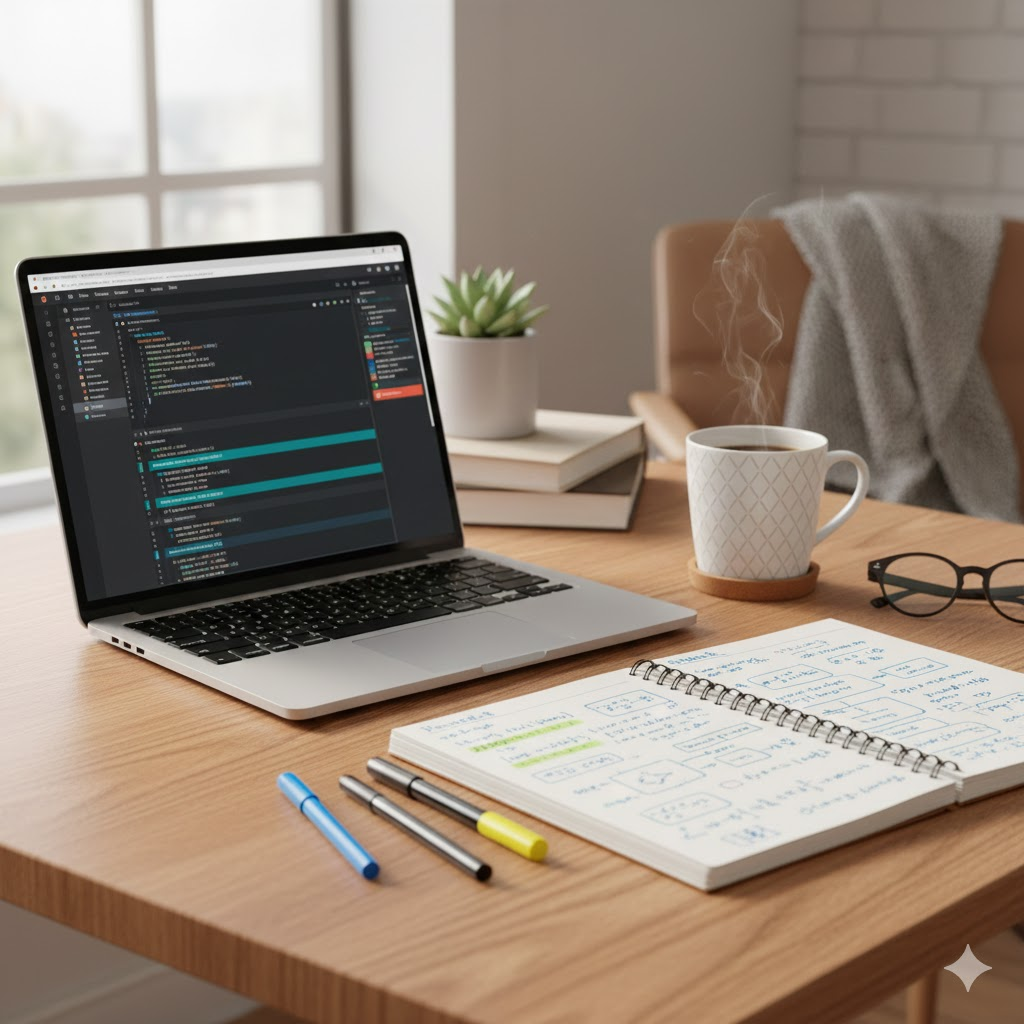

----------------------------------------
Match #2
File: img_12.json
Context: 
                Subject: Laptop displaying code with coffee and notebook
                Descriptio...


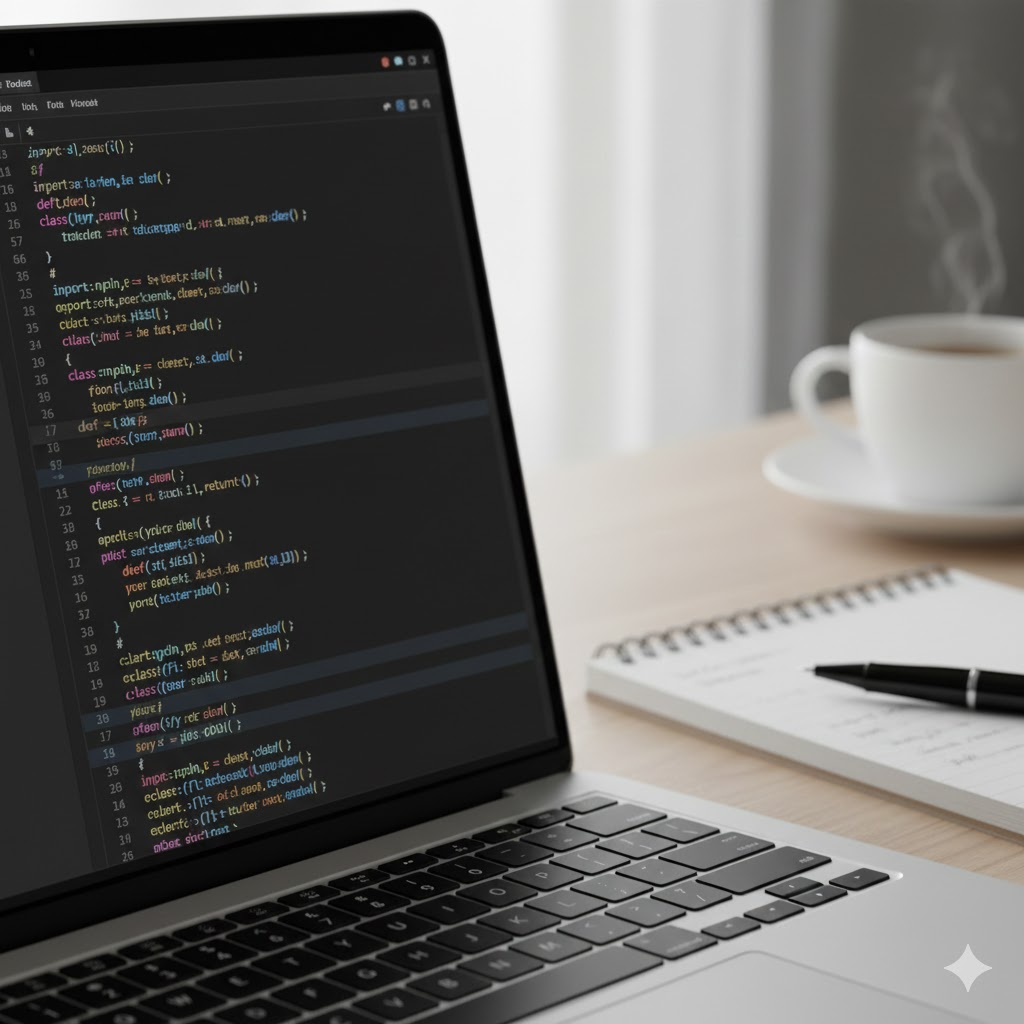

----------------------------------------
Match #3
File: ima_03.json
Context: 
                Subject: Nighttime desk setup for programming
                Description: A well-l...


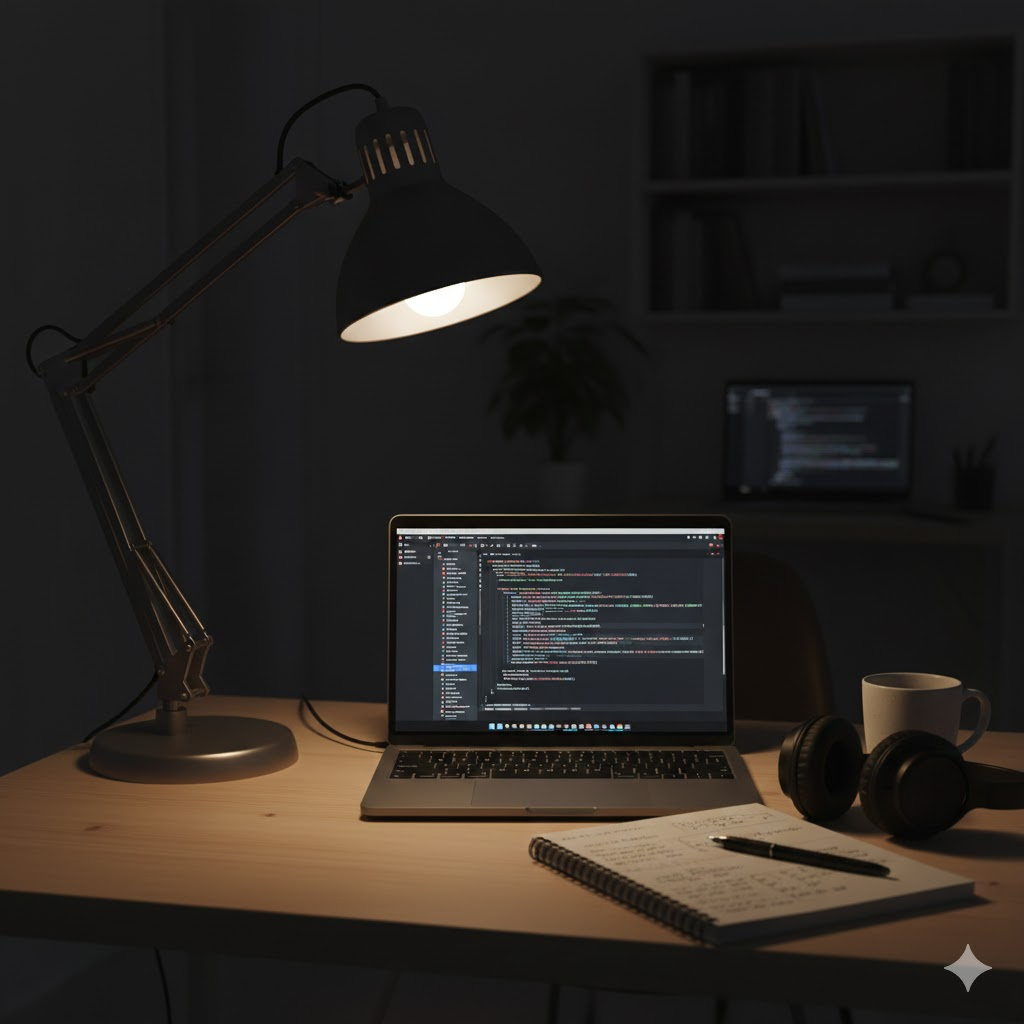

----------------------------------------


In [19]:
import os
from langchain_chroma import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from google.colab import userdata
from IPython.display import display, Image


# 🔹 UPDATED DB PATH
db_path = "/content/drive/MyDrive/Day17_RAG/chroma_db"

# IMPORTANT: Must use the exact same model name you used to create the DB
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

# Load the Database
vectorstore = Chroma(
    persist_directory=db_path,
    embedding_function=embeddings
)

print("Database loaded successfully!")


def search_images(query, top_k=3):
    """
    Searches the vector DB for images matching the text query.
    """

    # Perform Similarity Search
    results = vectorstore.similarity_search(query, k=top_k)

    if not results:
        print("No matches found.")
        return

    # Display Results
    for i, doc in enumerate(results):
        file_path = doc.metadata.get("file_path")
        file_name = doc.metadata.get("file_name")

        print(f"Match #{i+1}")
        print(f"File: {file_name}")
        print(f"Context: {doc.page_content[:100]}...")

        # Display the actual image
        if os.path.exists(file_path):
            display(Image(filename=file_path, width=300))
        else:
            print(f"Image file not found at: {file_path}")

        print("-" * 40)


# Example test searches
search_images("classroom workshop")
search_images("student studying with laptop")
search_images("presentation slide")
search_images("coding workspace")
